In [461]:
# python
import os, sys, pickle
from collections import OrderedDict
from itertools import combinations_with_replacement

# stats
import numpy as np
import pandas as pd
from statsmodels.api import OLS
from scipy.stats import pearsonr, spearmanr


# plot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# neural networks
import torch, torch.utils.model_zoo # required to load nets
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

# thesis library
from lib.functions_base_analysis        import *
from lib.functions_second_analysis      import *
from lib.ImageDataset                   import ImageDataset
from lib.NetworkScorer                  import NetworkScorer
from lib.PatternGenerator               import Pattern_Generator
from lib.ActivationPattern              import Activation_Pattern
from lib.transforms                     import VisualPriorRepresentation
from lib.PatternGeneratorSearchlight    import PatternGeneratorSearchlight

DATASET_NAMES               = ('places1', 'places2', 'oasis')
SCALE_NAMES                 = ('scale2','scale4','scale8','scale16','scale32')
STUDY_NAMES                 = ("short presentation", "long presentation", "complexity order")
BEHAVIOUR_NAMES             = ('study1_places1_short.csv','study2_places1.csv','study3_places2.csv','study4_oasis.csv')

PATH_IMAGES                 = '../images and ratings/imageversions_256'
PATH_RATINGS                = '../images and ratings/ratings'
PATH_INTEGRATION     = '../data csv/integration' # !! correlations, invert sign for integration
PATH_INTEGRATION_BLOCKED     = '../data csv/integration blocked' # !! correlations, invert sign for integration
PATH_IB_CORRELATIONS        = '../data csv/ibcorr'
PATH_IB_CORRELATIONS_BLOCKED= '../data csv/ibcorr blocked'

PATH_RESULTS                = '../results'
PATH_PLOTS                  = '../plots'

#VisualPrior.viable_feature_tasks
MODEL_NAMES = ('autoencoding','depth_euclidean','jigsaw','reshading',
               'edge_occlusion','keypoints2d','room_layout', #'colorization' currently not working
               'curvature','edge_texture','keypoints3d','segment_unsup2d',
               'class_object','egomotion','nonfixated_pose','segment_unsup25d',
               'class_scene','fixated_pose','normal','segment_semantic',
               'denoising','inpainting','point_matching','vanishing_point')

In [4]:
#DATA_PATH = './data_256x256'
#BEHAVIOR_PATH = './behavior'
#RESULTS_PATH = './data_integration_taskonomy'

# create folder structure

In [ ]:
# create folder structure for imageversions
for dataset_name in DATASET_NAMES:
    for scale_name in SCALE_NAMES:
        for version_name in ('full','version1','version2'):
            os.makedirs(os.path.join(PATH_IMAGES, dataset_name, scale_name, version_name))

## data csv

In [462]:
# integration
for model_name in MODEL_NAMES:
    for dataset_name in DATASET_NAMES:
        for scale_name in SCALE_NAMES:
            dir_path = os.path.join(PATH_INTEGRATION_BLOCKED, model_name, dataset_name, scale_name)
            os.makedirs(dir_path)

In [ ]:
# ibcorr
STUDY_NAMES = ('short presentation','long presentation','complexity order','oasis')

for model_name in MODEL_NAMES:
    for study_name in STUDY_NAMES:
        for scale_name in SCALE_NAMES:
            os.makedirs(os.path.join(PATH, model_name, study_name, scale_name))


## data mat

In [ ]:
for model_name in MODEL_NAMES:
    os.makedirs(os.path.join('../data mat', 'ibcorr', model_name))

In [ ]:
for model_name in MODEL_NAMES:
    os.makedirs(os.path.join('../data mat', 'ibcorr blocked', model_name))

In [488]:
for model_name in MODEL_NAMES:
    os.makedirs(os.path.join('../data mat', 'ibcorr blocked_integr', model_name))

In [484]:
for model_name in MODEL_NAMES:
    os.makedirs(os.path.join('../data mat', 'integration', model_name))

In [ ]:
for model_name in MODEL_NAMES:
    os.makedirs(os.path.join('../data mat', 'integration blocked', model_name))

# main analysis: part-whole correlations taskonomy 

In [ ]:
for model_name in MODEL_NAMES:
    print(model_name)

    # Import taskonomy model...
    VisualPriorRepresentation._load_unloaded_nets([model_name])
    net = VisualPriorRepresentation.feature_task_to_net[model_name]
    
    # ...and create activation extractor from it
    _, eval_nodes = get_graph_node_names(net)
    return_nodes = { node:node for node in eval_nodes if "conv" in node or 'fc' in node}
    activation_extractor = create_feature_extractor(net, return_nodes=return_nodes)


    for dataset_name in DATASET_NAMES:
        print(dataset_name)

        for scale_name in SCALE_NAMES:
            
            dataset = ImageDataset(
                os.path.join(PATH_IMAGES, dataset_name, scale_name))
                        
            correlations, selfsimilarity, l2norm = calculate_dataset_metrics(dataset, activation_extractor)
            
            correlations.fillna(correlations.mean())
            selfsimilarity.fillna(selfsimilarity.mean())
            l2norm.fillna(l2norm.mean())
            
            correlations.to_csv(os.path.join(PATH_INTEGRATION_VALUES, model_name, dataset_name, scale_name, 'correlations.csv'), index=False, header=False)
            selfsimilarity.to_csv(os.path.join(PATH_INTEGRATION_VALUES, model_name, dataset_name, scale_name, 'selfsimilarity.csv'), index=False, header=False)           
            l2norm.to_csv(os.path.join(PATH_INTEGRATION_VALUES, model_name, dataset_name, scale_name, 'l2norm.csv'), index=False, header=False)

# integration

## load

### unblocked

In [628]:
(pd.read_csv(os.path.join(PATH_INTEGRATION, mo, da, sc, 'correlations.csv'), header=None)
 .assign(scale=sc)
 .assign(dataset=da)
 .assign(model=mo)
 .reset_index()
 .rename({'index':'img'},axis=1)
 )

,img,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,scale,dataset,model
0,0,0.999978,0.827124,0.829580,0.726638,0.754999,0.859431,0.811926,0.811519,0.831983,...,0.852847,0.886227,0.858619,0.777157,0.941188,0.810009,0.796609,scale32,oasis,vanishing_point
1,1,0.999984,0.504402,0.484525,0.305409,0.398782,0.586113,0.549206,0.581287,0.626818,...,0.759869,0.824024,0.803743,0.699967,0.910179,0.756606,0.734527,scale32,oasis,vanishing_point
2,2,0.999993,0.578628,0.561461,0.397486,0.453588,0.633512,0.590682,0.581812,0.636550,...,0.727244,0.834480,0.825252,0.714713,0.923232,0.771472,0.761668,scale32,oasis,vanishing_point
3,3,0.999989,0.492101,0.505934,0.376241,0.329003,0.507843,0.494891,0.541190,0.614123,...,0.585956,0.699792,0.675255,0.523734,0.825970,0.562553,0.536809,scale32,oasis,vanishing_point
4,4,0.999976,0.811550,0.830340,0.715487,0.646149,0.736091,0.643773,0.758403,0.779395,...,0.558102,0.684006,0.632099,0.456453,0.821766,0.599565,0.603005,scale32,oasis,vanishing_point
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,0.999956,0.736979,0.673799,0.526840,0.607299,0.707614,0.651883,0.668758,0.715317,...,0.664586,0.795413,0.780625,0.615202,0.885734,0.708818,0.671519,scale32,oasis,vanishing_point
896,896,0.999994,0.559089,0.519985,0.297355,0.417353,0.566333,0.496001,0.574783,0.624329,...,0.622042,0.733100,0.715691,0.617944,0.860645,0.687849,0.687529,scale32,oasis,vanishing_point
897,897,0.999986,0.745100,0.731699,0.580535,0.622249,0.736262,0.665095,0.708760,0.751446,...,0.628190,0.772020,0.758465,0.607450,0.891339,0.721758,0.712408,scale32,oasis,vanishing_point
898,898,0.999987,0.481061,0.533987,0.457241,0.254065,0.408789,0.431091,0.489067,0.547219,...,0.471179,0.617615,0.587472,0.437577,0.808765,0.554371,0.535013,scale32,oasis,vanishing_point


In [634]:
# load integration, selfsim and l2norm
cl, sl, nl = [],[],[]


for mo in MODEL_NAMES:
    for da in DATASET_NAMES:
        for sc in SCALE_NAMES:

            c = (pd.read_csv(os.path.join(PATH_INTEGRATION, mo, da, sc, 'correlations.csv'), header=None)
                 .assign(scale=sc)
                 .assign(dataset=da)
                 .assign(model=mo)
                 .reset_index()
                 .rename({'index':'img'},axis=1))
            
            s = (pd.read_csv(os.path.join(PATH_INTEGRATION, mo, da, sc, 'selfsimilarity.csv'), header=None)
                 .assign(scale=sc)
                 .assign(dataset=da)
                 .assign(model=mo)
                 .reset_index()
                 .rename({'index':'img'},axis=1))

            n = (pd.read_csv(os.path.join(PATH_INTEGRATION, mo, da, sc, 'l2norm.csv'), header=None)
                 .assign(scale=sc)
                 .assign(dataset=da)
                 .assign(model=mo)
                 .reset_index()
                 .rename({'index':'img'},axis=1))
            
            cl.append(c)
            sl.append(s)
            nl.append(n)

# convert correlation to integration
dfc = -pd.concat(cl).set_index(['model','dataset','scale','img'])
dfs = pd.concat(sl).set_index(['model','dataset','scale','img'])
dfn = pd.concat(nl).set_index(['model','dataset','scale','img'])


### blocked

## block
block layers accoring to vgg50 inherent blocks

In [ ]:
dfc_blocked = (dfc
      .T
      .set_index(np.insert(np.repeat(range(2,17+1), 3),0,1))
      .T
      .groupby(level=0,axis=1).mean()
      .sort_index())

dfs_blocked = (dfs
      .T
      .set_index(np.insert(np.repeat(range(2,17+1), 3),0,1))
      .T
      .groupby(level=0,axis=1).mean()
      .sort_index())

dfn_blocked = (dfn
      .T
      .set_index(np.insert(np.repeat(range(2,17+1), 3),0,1))
      .T
      .groupby(level=0,axis=1).mean()
      .sort_index())

In [487]:
# save blocked integration, selfsim, l2norm
for m in MODEL_NAMES:
    for d in DATASET_NAMES:
        for sc in SCALE_NAMES:
            dfc_blocked.loc[(m, d, sc),:].to_csv(os.path.join(PATH_INTEGRATION_BLOCKED, m, d, sc, 'correlations.csv'), index=False, header=False)
            dfs_blocked.loc[(m, d, sc),:].to_csv(os.path.join(PATH_INTEGRATION_BLOCKED, m, d, sc, 'selfsimilarity.csv'), index=False, header=False)
            dfn_blocked.loc[(m, d, sc),:].to_csv(os.path.join(PATH_INTEGRATION_BLOCKED, m, d, sc, 'l2norm.csv'), index=False, header=False)

## visualize

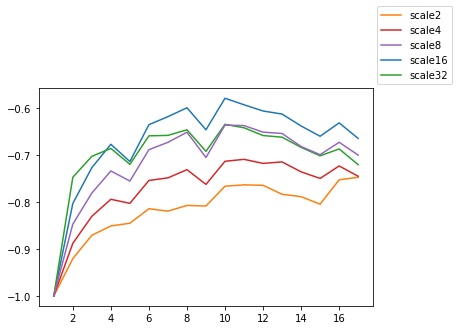

In [459]:
handles, labels = df.groupby('scale').mean().transpose().plot().get_legend_handles_labels()
order = [1, 3, 4, 0, 2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.25, 1.4))

# ibcorr & pvalues

## load ibcorr

### unblocked

In [ ]:


#ib_list, ss_list, ibss_list = [],[],[]
ib_list = []
for model_name in MODEL_NAMES:
    for study_name in STUDY_NAMES:
        for scale_name in SCALE_NAMES:
            ib = pd.read_csv(os.path.join(PATH_IB_CORRELATIONS, model_name, study_name, scale_name, 'ib_correlations.csv'), header=None).transpose()
            ib.insert(0, 'scale', scale_name)
            ib.insert(0, 'study',study_name)
            ib.insert(0, 'model', model_name)
            ib_list.append(ib)
            # ss = pd.read_csv(os.path.join(PATH_IB_CORRELATIONS, model_name, study_name, scale_name, 'self_similarity.csv'), header=None).transpose()
            # ss.insert(0, 'scale', scale_name)
            # ss.insert(0, 'study',study_name)
            # ss.insert(0, 'model', model_name)
            # ss_list.append(ss)
            # ibss = pd.read_csv(os.path.join(PATH_IB_CORRELATIONS, model_name, study_name, scale_name, 'ib_correlation_ss_partialed.csv'), header=None).transpose()
            # ibss.insert(0, 'scale', scale_name)
            # ibss.insert(0, 'study',study_name)
            # ibss.insert(0, 'model', model_name)
            # ibss_list.append(ibss)
df_ib = pd.concat(ib_list).set_index(['model','study','scale']).rename(columns=lambda x:x+1)
# ss_df = pd.concat(ss_list).set_index(['model','study','scale']).rename(columns=lambda x:x+1)
# ibss_df = pd.concat(ibss_list).set_index(['model','study','scale']).rename(columns=lambda x:x+1)

### blocked

In [ ]:
data_list = []
for model_name in MODEL_NAMES:
    for study_name in STUDY_NAMES:
        for scale_name in SCALE_NAMES:
            data = pd.read_csv(os.path.join(DATA_PATH, model_name, study_name, scale_name, 'ib_correlations.csv'), header=None)
            data.insert(0, 'scale', scale_name)
            data.insert(0, 'study',study_name)
            data.insert(0, 'model', model_name)
            data_list.append(data)

# add layer labels
data_list = [data.reset_index().rename(columns={"index":"layer", 0:"ibcorr"}) for data in data_list]

# combine into one DataFrame
dfc = pd.concat(data_list).reset_index(drop=True).set_index(['model','study','scale','layer'])

## load pvalues

### unblocked

In [ ]:
data_list = []
for model_name in MODEL_NAMES:
    for study_name in STUDY_NAMES:
        for scale_name in SCALE_NAMES:
            data = pd.read_csv(os.path.join(PATH_IB_CORRELATIONS, model_name, study_name, scale_name, 'ib_correlations_pvalues.csv'), header=None)
            data.insert(0, 'scale', scale_name)
            data.insert(0, 'study',study_name)
            data.insert(0, 'model', model_name)
            data_list.append(data)
# layer labels
data_list = [data.reset_index().rename(columns={"index":"layer", 0:"ibcorr pvalue"}) for data in data_list]
# combine into one DataFrame
df_p = (pd.concat(data_list)
        .reset_index(drop=True)
        .set_index(['model','study','scale','layer'])
        .unstack('layer'))

### blocked

In [ ]:
data_list = []
for model_name in MODEL_NAMES:
    for study_name in STUDY_NAMES:
        for scale_name in SCALE_NAMES:

            data = pd.read_csv(os.path.join(PATH_IB_CORRELATIONS_BLOCKED, model_name, study_name, scale_name, 'ib_correlations_pvalues.csv'), header=None)
            data.insert(0, 'scale', scale_name)
            data.insert(0, 'study',study_name)
            data.insert(0, 'model', model_name)

            data_list.append(data)
            #selfsimilarity.to_csv(os.path.join(RESULTS_PATH, model_name, dataset_name, scale_name, 'selfsimilarity.csv'), index=False, header=False)           
            #l2norm.to_csv(os.path.join(RESULTS_PATH, model_name, dataset_name, scale_name, 'l2norm.csv'), index=False, header=False)

# add layer labels
data_list = [data.reset_index().rename(columns={"index":"layer", 0:"ibcorr pvalue"}) for data in data_list]

# combine into one DataFrame
dfp = pd.concat(data_list).reset_index(drop=True).set_index(['model','study','scale','layer'])
dfp

# scale selection

In [394]:
# plot only significant pixels, bonferroni MCC
adjusted_pvalue = 0.05/49
df_ib_sig = df_ib.copy()
df_ib_sig.iloc[(df_p > adjusted_pvalue).values] = np.nan

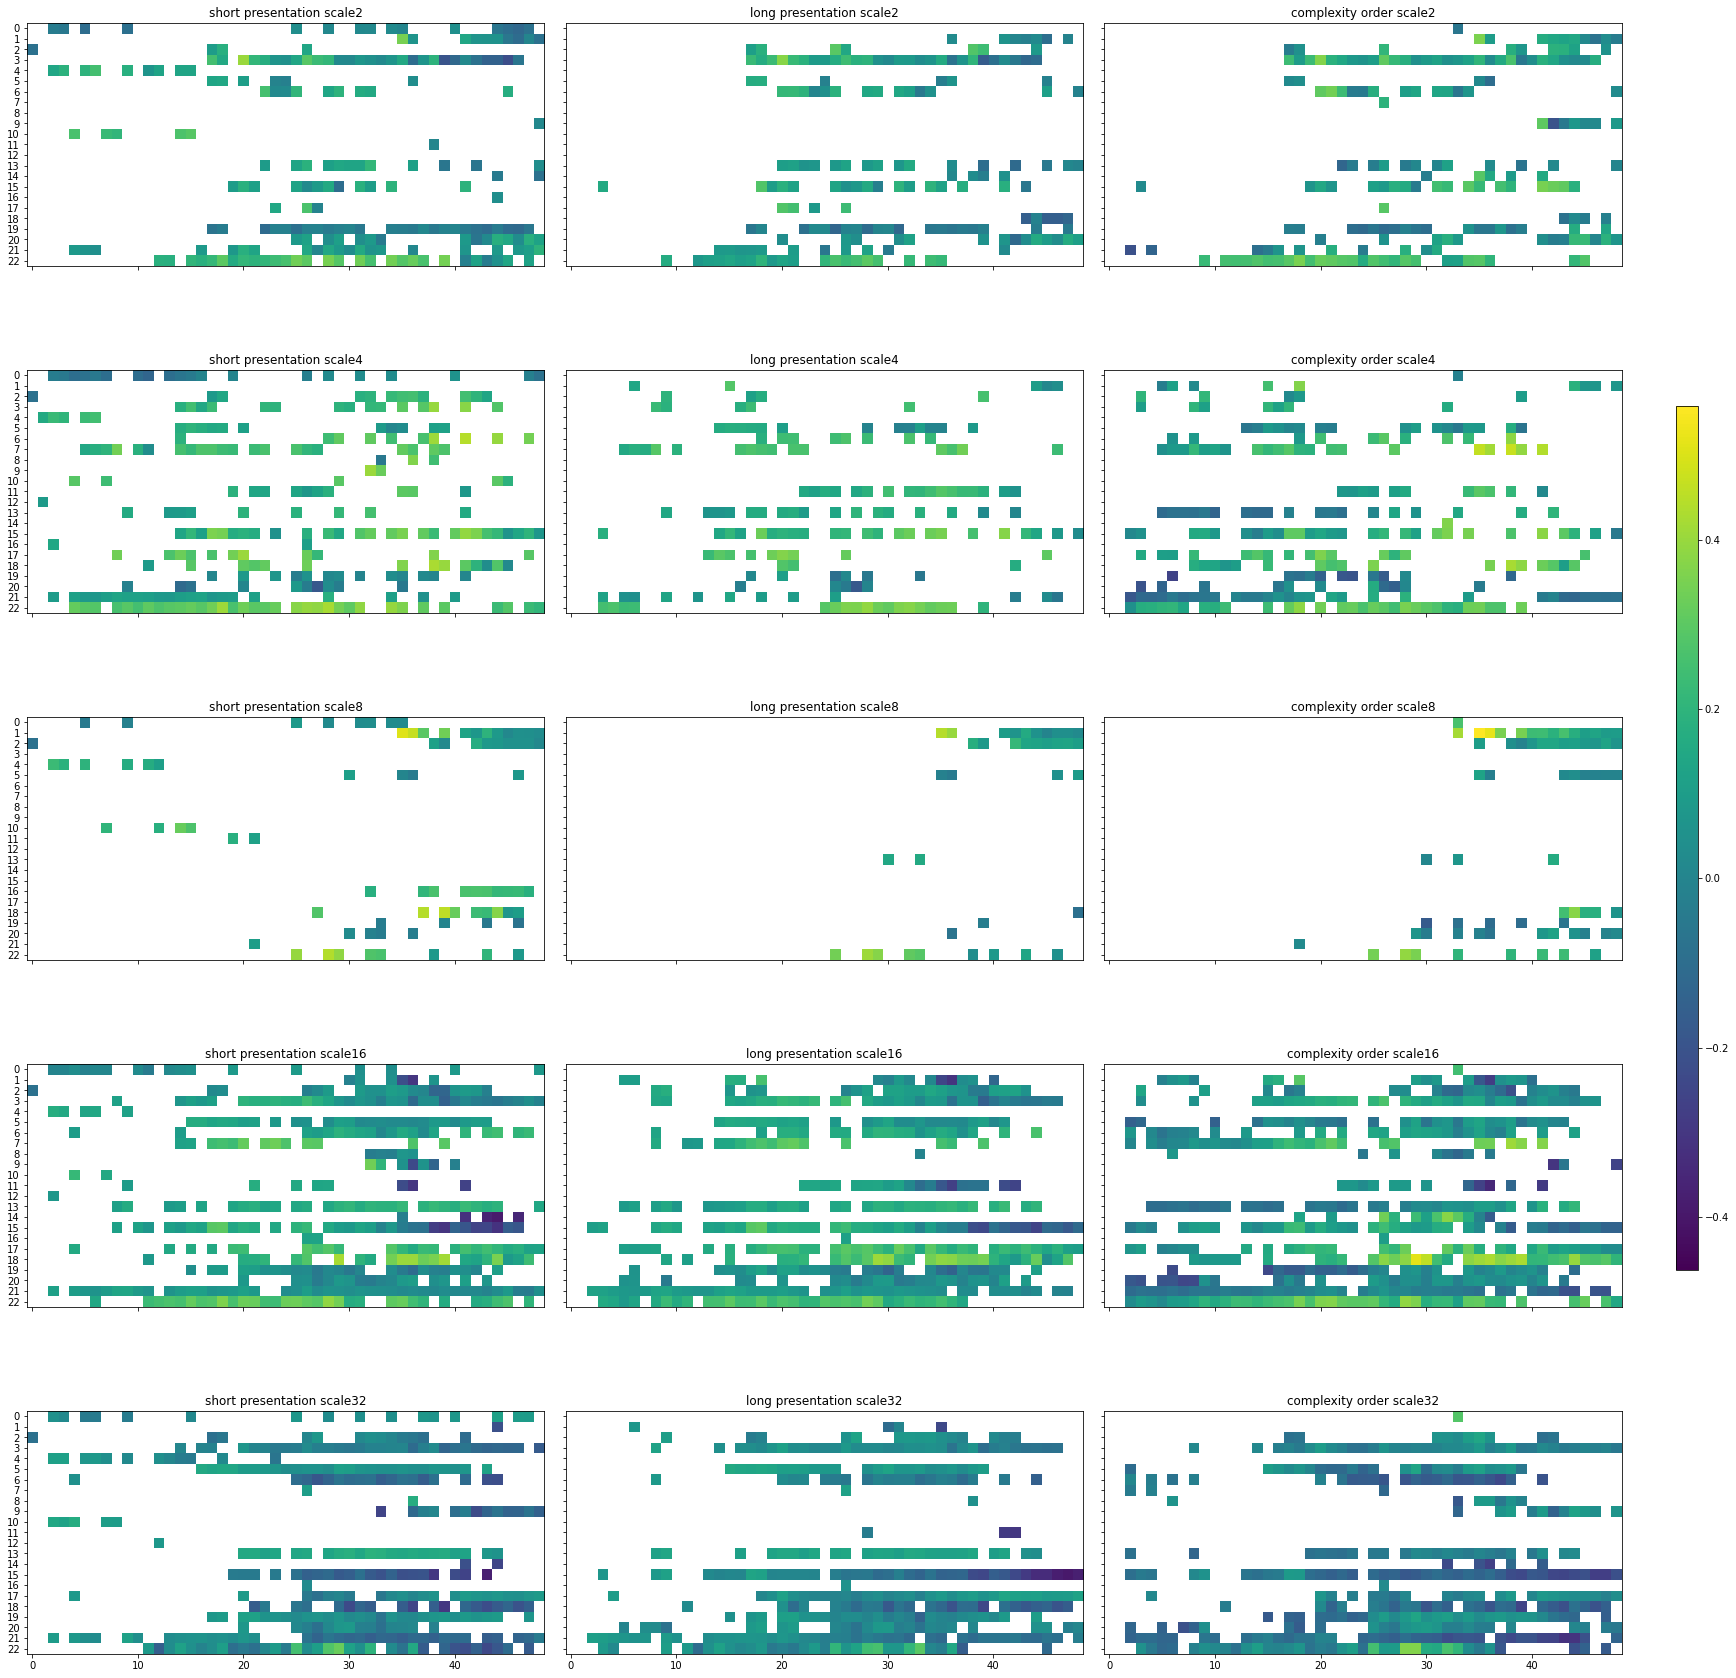

In [395]:
# scale x study grid of all-net heatmaps
fig, axes = plt.subplots(5, 3, figsize=(24,24), sharex=True,sharey=True, constrained_layout=True)

for idsc, scale in enumerate(SCALE_NAMES):
    for idst, study in enumerate(STUDY_NAMES):
        corr= df_ib_sig.loc[(slice(None), study,scale),:].droplevel(['scale','study'])
        p   = df_p.loc[(slice(None), study,scale),:].droplevel(['scale','study'])

        ax = axes[idsc,idst]
        im = ax.imshow(corr, vmin=df_ib.min().min(), vmax=df_ib.max().max())
        #ax.contour(p, levels=[0.05], colors='orange', linewidths=5, corner_mask = False)

        ax.set_yticks(range(len(corr.index)))
        #ax.set_yticklabels(corr.index)
        ax.set_title(study + ' ' + scale)

fig.colorbar(im, ax =axes,orientation='vertical', fraction=.2, pad=0.03, shrink=.5)
#plt.subplots_adjust(hspace=0.2, wspace=.005)
#plt.tight_layout()

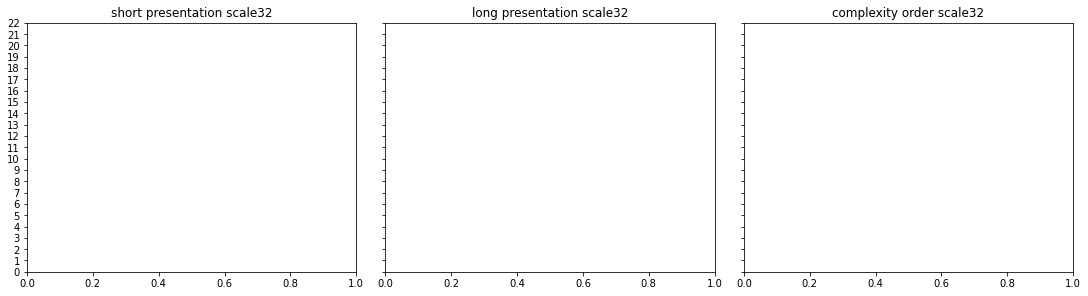

In [405]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharex=True,sharey=True, constrained_layout=True)


for idst, study in enumerate(STUDY_NAMES):
    corr= df_ib.loc[(slice(None),study, 'scale16'),:].droplevel(['scale','study'])
    p   = df_p.loc[(slice(None), study,scale),:].droplevel(['scale','study'])
    ax = axes[idst]
    
    ax.set_yticks(range(len(corr.index)))
    #ax.set_yticklabels(corr.index)
    ax.set_title(study + ' ' + scale)



# blocking
for  scale 16

In [ ]:
dfc = dfc.loc[(slice(None),'places1', 'scale16'),:].droplevel(['scale','dataset'])

## show oscillations

In [704]:
df_maxidx = dfc.iloc[:,slice(27,43+1)].std(axis=1).groupby('model').idxmax().apply(lambda tup: tup[1])

In [701]:
df_maxidx = dfc.std(axis=1).groupby('model').idxmax().apply(lambda tup: tup[1])

Text(0.5, 1.0, 'network means')

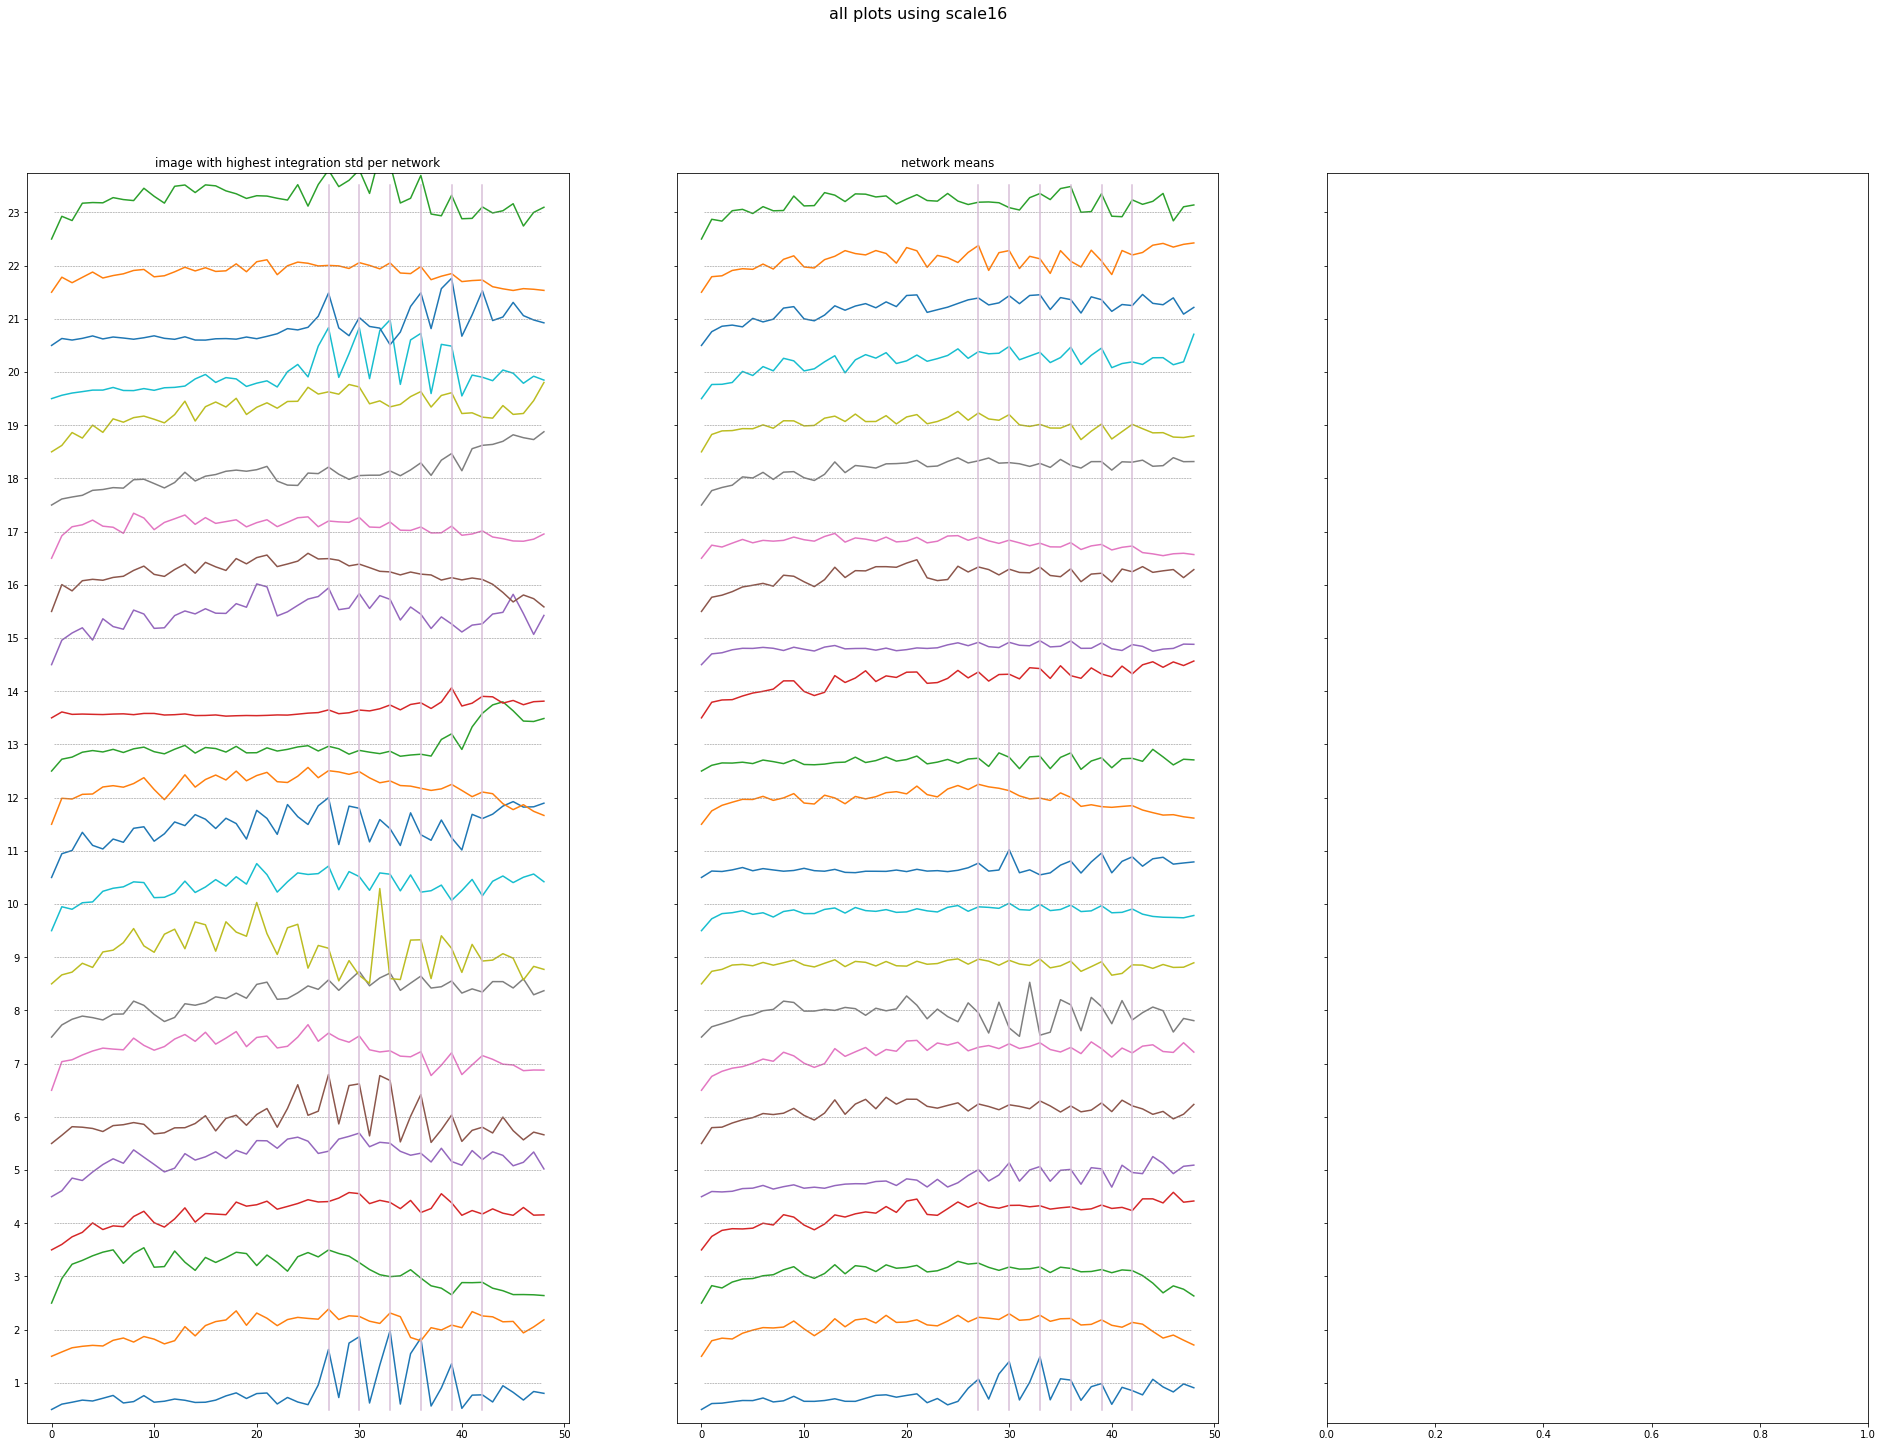

In [705]:
# integration
layers = slice(0,49) #first to last layers to plot
yscaling = 3
fig, axes = plt.subplots(1, 3, figsize=(33,23), sharey=True)
fig.suptitle('all plots using scale16', fontsize=16)


# for idst, study in enumerate(STUDY_NAMES):
#     corr= df_ib.loc[(slice(None),study, 'scale16'),:].droplevel(['scale','study'])
#     p   = df_p.loc[(slice(None), study,scale),:].droplevel(['scale','study'])
#     ax = axes[idst]
    
#     ax.set_yticks(range(len(corr.index)))
#     #ax.set_yticklabels(corr.index)
#     ax.set_title(study + ' ' + scale)

# individual images
ax = axes[0]

for y,model in enumerate(MODEL_NAMES):
    maxidx = df_maxidx.loc[model]
    data = dfc.loc[(model, maxidx),:].iloc[layers]
    ax.plot(yscaling*data+2*y+3)
    ax.axhline(y=2*y+1, color='grey', linestyle='--', linewidth=0.5, xmin=.05,xmax=.95)

for layer in range(27, 45, 3):
    ax.axvline(layer, color='thistle', ymin=.01, ymax=.99)

ax.set_ylim(0, 23*2+3)
ax.set_yticks(range(1,23*2,2));
ax.set_yticklabels(range(1,23+1));
ax.set_title('image with highest integration std per network')




# network means
ax = axes[1]
tmp = dfc.groupby('model').mean()
for y,model in enumerate(MODEL_NAMES):
    ax.plot(yscaling*tmp.iloc[y,layers]+2*y+3)
    ax.axhline(y=2*y+1, color='grey', linestyle='--', linewidth=0.5, xmin=.05,xmax=.95)

for layer in range(27, 45, 3):
    ax.axvline(layer, color='thistle', ymin=.01, ymax=.99)

ax.set_ylim(-.5, 23*2+.5)
ax.set_yticks(range(1,23*2,2));
ax.set_yticklabels(range(1,23+1));
ax.set_title('network means')


# # Add legends, labels, and title
# ax.legend()
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# 

# # Show the plot
# plt.show()
#plt.tight_layout()


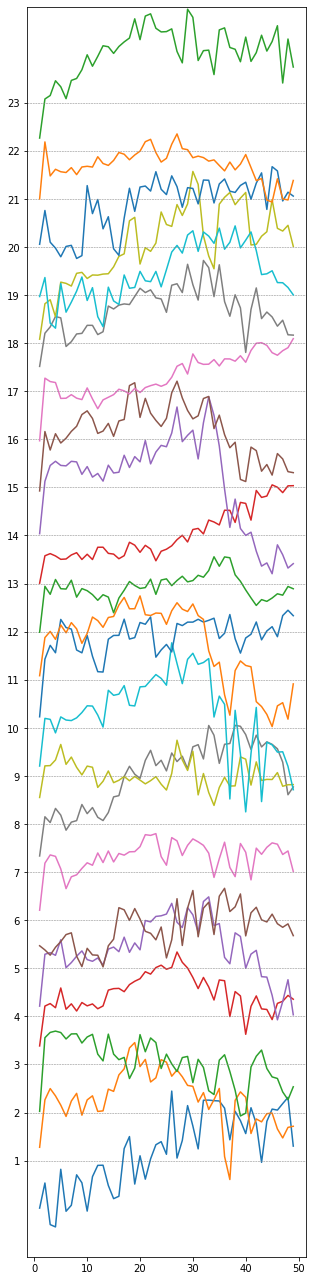

In [489]:
# in ibcorr
# unblocked view of scale16

tmp = df_ib.loc[(slice(None),study, 'scale16'),:]

fig, ax = plt.subplots(figsize=(5,23))


# for idst, study in enumerate(STUDY_NAMES):
#     corr= df_ib.loc[(slice(None),study, 'scale16'),:].droplevel(['scale','study'])
#     p   = df_p.loc[(slice(None), study,scale),:].droplevel(['scale','study'])
#     ax = axes[idst]
    
#     ax.set_yticks(range(len(corr.index)))
#     #ax.set_yticklabels(corr.index)
#     ax.set_title(study + ' ' + scale)

for y,model in enumerate(MODEL_NAMES):
    ax.plot(10*tmp.iloc[y,slice(None)]+2*y+1)
    ax.axhline(y=2*y+1, color='grey', linestyle='--', linewidth=0.5)

ax.set_ylim(-3, 23*2+3)
ax.set_yticks(range(1,23*2,2));
ax.set_yticklabels(range(1,23+1));

# Plot each line with its offset
# ax.plot(x, y1, label='sin(x)')
# ax.plot(x, y2_offset, label=f'cos(x) + {offset}')
# ax.plot(x, y3_offset, label=f'exp(x/10) + {2 * offset}')

# # Optionally, add horizontal lines to indicate the offset
# ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)
# ax.axhline(y=offset, color='grey', linestyle='--', linewidth=0.5)
# ax.axhline(y=2 * offset, color='grey', linestyle='--', linewidth=0.5)

# # Add legends, labels, and title
# ax.legend()
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_title('Multiple Lines with Y-Offset')

# # Show the plot
# plt.show()


# test: heatmap significance

In [145]:
data = np.pad(np.random.random((10, 10)), 1)
data.shape

(12, 12)

In [180]:
data = np.random.random((10, 10))

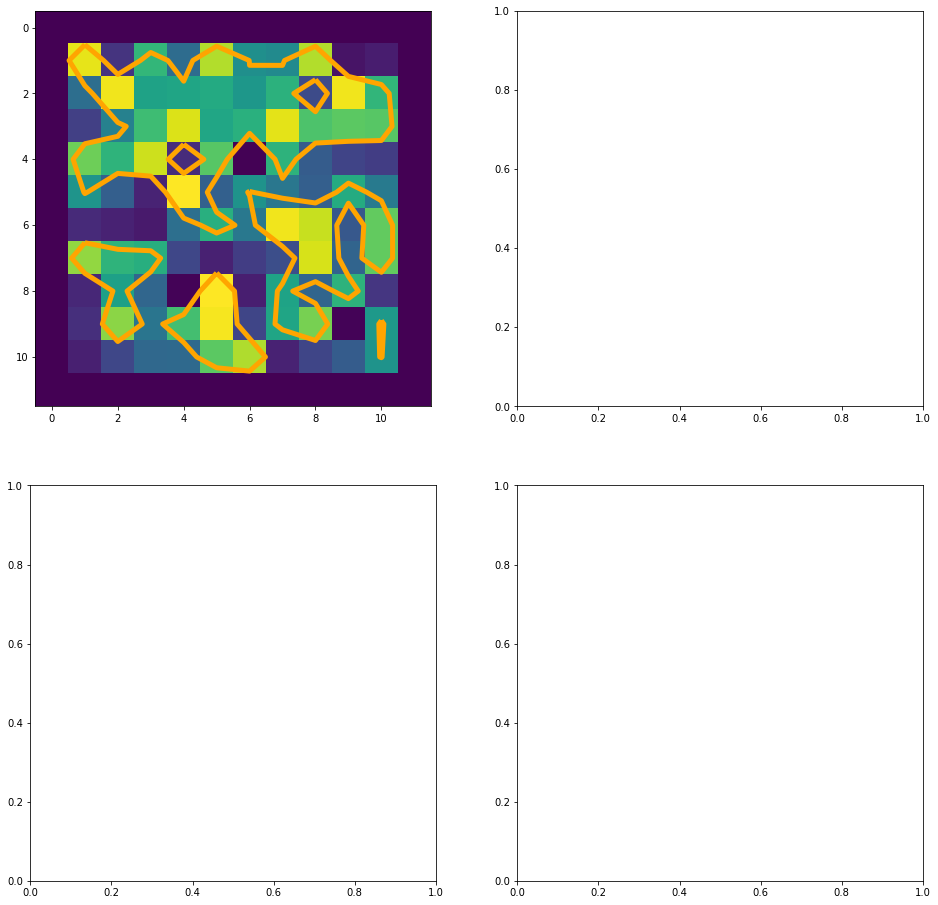

In [209]:
#data = np.pad(np.random.random((10, 10)), 1)
fig, ax = plt.subplots(2,2, figsize = (16,16))

# Example significance mask (True for significant, False for not)
# Let's assume that any value greater than 0.8 is significant
significance_mask = data > 0.8

# Plotting the heatmap
ax[0,0].imshow(data, cmap='viridis')

# Overlay the contours for significance
ax[0,0].contour(data, levels=[.5], colors='orange', linewidths=5, corner_mask = False)

# Add colorbar
#plt.colorbar()

# Show the plot
plt.show()
